In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
y_test = df_test['diagnosis']
x_train_values = df_train.drop(columns=["diagnosis"]).values
x_test_values = df_test.drop(columns=["diagnosis"]).values
print(y_test)

0      1
1      0
2      0
3      1
4      0
      ..
109    0
110    0
111    0
112    1
113    1
Name: diagnosis, Length: 114, dtype: int64


In [ ]:
x_train_values_all=x_train_values
x_test_values_all=x_test_values
x_train_values_sp=x_train_values
x_test_values_sp=x_test_values


In [ ]:
scaler = StandardScaler()
normalizer = Normalizer()
pca = PCA(n_components=15)

In [ ]:
preprocessing_pipe_all = Pipeline([("normalizer", normalizer), ("scaler", scaler), ("pca", pca)])
preprocessing_pipe_sp = Pipeline([("scaler", scaler), ("pca", pca)])
preprocessing_pipe = Pipeline([("scaler", scaler)])

In [ ]:
y = df_train["diagnosis"].values

preprocessing_pipe_all.fit(x_train_values_all)
x_train_transformed_all = preprocessing_pipe_all.transform(x_train_values_all)
x_test_tranformed_all=preprocessing_pipe_all.transform(x_test_values_all)

preprocessing_pipe_sp.fit(x_train_values_sp)
x_train_transformed_sp = preprocessing_pipe_sp.transform(x_train_values_sp)
x_test_tranformed_sp=preprocessing_pipe_sp.transform(x_test_values_sp)


preprocessing_pipe.fit(x_train_values)
x_train_transformed = preprocessing_pipe.transform(x_train_values)
x_test_tranformed=preprocessing_pipe.transform(x_test_values)



In [ ]:
def getAdaboostConfigTrained():
    model = AdaBoostClassifier(algorithm = "SAMME.R",
        base_estimator= None,
        learning_rate= 0.5,
        n_estimators = 100)
    return model

def getSVCConfigTrained():
    model = SVC(C = 0.1,
        coef0= 10,
        degree = 3,
        gamma = "auto",
        kernel="poly",
        shrinking= True,
        tol=0.1)
    return model

def getLogisticRegConfigTrained():
    model = LogisticRegression(
        C = 0.4,
        dual = True,
        penalty = "l2",
        solver = "liblinear",
        tol = 1)
    return model

def getRandomForestConfigTrained():
  model= RandomForestClassifier(
        bootstrap = False,
        criterion = "entropy",
        max_features = "auto",
        min_samples_leaf = 2,
        min_samples_split = 10,
        n_estimators = 250)
  return model

def neuralnetworkConfigTrained():
  model = Sequential([
        Dense(128, activation='relu', input_shape=(x_train_transformed_sp.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
  model.compile(optimizer=Adam(learning_rate=0.00015), loss='binary_crossentropy', 
                  metrics=['accuracy'])
  return 

def getKNeighboursConfigTrained():
    model = KNeighborsClassifier(
        algorithm = "auto",
        leaf_size = 1,
        metric = "manhattan",
        n_neighbors = 5,
        p = 1,
        weights = "uniform")
    return model

### Logistic Regression

In [ ]:
logistic_model = getLogisticRegConfigTrained()
logistic_model.fit(x_train_transformed_sp, y)
pred = logistic_model.predict(x_test_tranformed_sp)
mse_lr = mean_squared_error(pred,y_test)**0.5
f1_lr = f1_score(pred,y_test)
accuracy_lr = accuracy_score(pred,y_test)
roc_auc_lr = roc_auc_score(pred,y_test)
print("MSE of Logistic Regression", mse_lr)
print("F1 score of Logistic Regression", f1_lr )
print("accuracy of Logistic Regression", accuracy_lr)
print("roc auc of Logistic Regression", roc_auc_lr )
lrmetrics = {"accuracy":accuracy_lr, "F1 score":f1_lr, "roc":roc_auc_lr, "mse":mse_lr}

MSE of Logistic Regression 0.16222142113076254
F1 score of Logistic Regression 0.9610389610389611
accuracy of Logistic Regression 0.9736842105263158
roc auc of Logistic Regression 0.9736842105263158


### SVC

In [ ]:
svc_model = getSVCConfigTrained()
svc_model.fit(x_train_transformed_all, y)
pred = svc_model.predict(x_test_tranformed_all)
mse_svc = mean_squared_error(pred,y_test)**0.5
f1_svc = f1_score(pred,y_test)
accuracy_svc = accuracy_score(pred,y_test)
roc_auc_svc = roc_auc_score(pred,y_test)
print("MSE of svc",mse_svc)
print("F1 score of SVC", f1_svc)
print("accuracy of svc", accuracy_svc)
print("roc auc of SVC", roc_auc_svc)
svcmetrics = {"accuracy":accuracy_svc, "F1 score":f1_svc, "roc":roc_auc_svc, "mse":mse_svc}


MSE of svc 0.0936585811581694
F1 score of SVC 0.9873417721518987
accuracy of svc 0.9912280701754386
roc auc of SVC 0.9875


### Adaboost

In [ ]:
adaboost_model = getAdaboostConfigTrained()
adaboost_model.fit(x_train_transformed_sp, y)
pred = adaboost_model.predict(x_test_tranformed_sp)
mse_ada = mean_squared_error(pred,y_test)**0.5
f1_ada = f1_score(pred,y_test)
accuracy_ada = accuracy_score(pred,y_test)
roc_auc_ada = roc_auc_score(pred,y_test)
print("MSE of adaboost", mse_ada)
print("F1 score of adaboost", f1_ada)
print("accuracy of adaboost", accuracy_ada)
print("roc auc of adaboost", roc_auc_ada)
adametrics = {"accuracy":accuracy_ada, "F1 score":f1_ada, "roc":roc_auc_ada, "mse":mse_ada}

MSE of adaboost 0.1873171623163388
F1 score of adaboost 0.9500000000000001
accuracy of adaboost 0.9649122807017544
roc auc of adaboost 0.9565653190778483


### random forest

In [ ]:
rf_model = getRandomForestConfigTrained()
rf_model.fit(x_train_transformed, y)
pred = rf_model.predict(x_test_tranformed)
mse_rf = mean_squared_error(pred,y_test)**0.5
f1_rf = f1_score(pred,y_test)
accuracy_rf = accuracy_score(pred,y_test)
roc_auc_rf = roc_auc_score(pred,y_test)
print("MSE of random forest",mse_rf)
print("F1 score of random forest", f1_rf)
print("accuracy of random forest", accuracy_rf)
print("roc auc of random forest", roc_auc_rf)
rfmetrics = {"accuracy":accuracy_rf, "F1 score":f1_rf, "roc":roc_auc_rf, "mse":mse_rf}

MSE of random forest 0.13245323570650439
F1 score of random forest 0.975
accuracy of random forest 0.9824561403508771
roc auc of random forest 0.975609756097561


### Neural network

In [ ]:
nn_model = neuralnetworkConfigTrained()
nn_model.fit(x_train_transformed, y, epochs=200, batch_size=32, verbose=1)
pred = nn_model.predict(x_test_tranformed)
print("MSE of neural network",mean_squared_error(pred,y_test)**0.5)
print("accuracy of neural network", accuracy_score(pred,y_test))

AttributeError: ignored

### KNN

In [ ]:
knn_model = getKNeighboursConfigTrained()
knn_model.fit(x_train_transformed_all, y)
pred_knn = knn_model.predict(x_test_tranformed_all)
mse_knn = mean_squared_error(pred,y_test)**0.5
f1_knn = f1_score(pred,y_test)
accuracy_knn = accuracy_score(pred,y_test)
roc_auc_knn = roc_auc_score(pred,y_test)
print("MSE of KNN",mse_knn)
print("F1 score of KNN", f1_knn)
print("accuracy of KNN", accuracy_knn)
print("roc auc of KNN", roc_auc_knn)
knnmetrics = {"accuracy":accuracy_knn, "F1 score":f1_knn, "roc":roc_auc_knn, "mse":mse_knn}

MSE of KNN 0.13245323570650439
F1 score of KNN 0.975
accuracy of KNN 0.9824561403508771
roc auc of KNN 0.975609756097561


In [ ]:
metrics = {"logistic regression":lrmetrics, "SVC":svcmetrics, "adaboost":adametrics, 
           "Random Forest":rfmetrics, "KNN":knnmetrics}
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df

#xyz = pd.DataFrame(metrics,index=["Logistic Regression","SVC","Adaboost","Random Forest","KNN"])

,logistic regression,SVC,adaboost,Random Forest,KNN
accuracy,0.973684,0.991228,0.964912,0.982456,0.964912
F1 score,0.961039,0.987342,0.950000,0.975000,0.950000
roc,0.973684,0.987500,0.956565,0.975610,0.956565
mse,0.162221,0.093659,0.187317,0.132453,0.187317


In [ ]:
accuracy = {"Logistic Regression":accuracy_lr, "SVC":accuracy_svc, "Adaboost":accuracy_ada, 
            "Random Forest":accuracy_rf, "KNN":accuracy_knn}
F1 = {"Logistic Regression":f1_lr, "SVC":f1_svc, "Adaboost":f1_ada, 
            "Random Forest":f1_rf, "KNN":f1_knn}
ROC = {"Logistic Regression":roc_auc_lr, "SVC":roc_auc_svc, "Adaboost":roc_auc_ada, 
            "Random Forest":roc_auc_rf, "KNN":roc_auc_knn}
mse = {"Logistic Regression":mse_lr, "SVC":mse_svc, "Adaboost":mse_ada, 
            "Random Forest":mse_rf, "KNN":mse_knn}

metrics = {"Accuracy":accuracy, "F1 score":F1, "ROC":ROC, 
           "MSE":mse}
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df

,Accuracy,F1 score,ROC,MSE
Logistic Regression,0.973684,0.961039,0.973684,0.162221
SVC,0.991228,0.987342,0.987500,0.093659
Adaboost,0.964912,0.950000,0.956565,0.187317
Random Forest,0.982456,0.975000,0.975610,0.132453
KNN,0.982456,0.975000,0.975610,0.132453


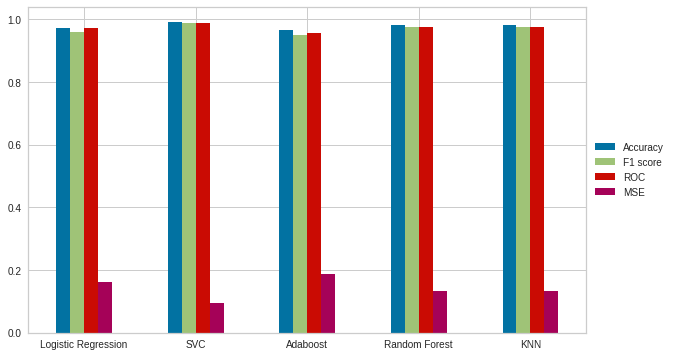

In [ ]:
bar = metrics_df.plot.bar(rot=0,figsize=(10,6))
bar.legend(loc="center left",bbox_to_anchor=(1,0.5))
#try to separate legend from bar plot